# Think Bayes

This notebook presents example code and exercise solutions for Think Bayes.

Copyright 2018 Allen B. Downey

MIT License: https://opensource.org/licenses/MIT

In [1]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import classes from thinkbayes2
from thinkbayes2 import Hist, Pmf, Suite
import thinkplot

## The hyrax problem

Suppose I capture and tag 10 rock hyraxes.  Some time later, I capture another 10 hyraxes and find that two of them are already tagged.  How many hyraxes are there in this environment?

As always with problems like this, we have to make some modeling assumptions. 

1) For simplicity, you can assume that the environment is reasonably isolated, so the number of hyraxes does not change between observations.

2) And you can assume that each hyrax is equally likely to be captured during each phase of the experiment, regardless of whether it has been tagged.  In reality, it is possible that tagged animals would avoid traps in the future, or possible that the same behavior that got them caught the first time makes them more likely to be caught again.  But let's start simple.

I suggest the following notation:

*  `N`: total population of hyraxes 
*  `K`: number of hyraxes tagged in the first round 
*  `n`: number of hyraxes caught in the second round
*  `k`: number of hyraxes in the second round that had been tagged

So `N` is the hypothesis and `(K, n, k)` make up the data.  The probability of the data, given the hypothesis, is the probability of finding `k` tagged hyraxes out of `n` if (in the population) `K` out of `N` are tagged. 

If you are familiar with the hypergeometric distribution, you can use the hypergeometric PMF to compute the likelihood function.  Otherwise, you can figure it out using combinatorics.

In [2]:
# Solution

from scipy.special import binom

class Hyrax(Suite):
    """Represents hypotheses about how many hyraxes there are."""

    def Likelihood(self, data, hypo):
        """Computes the likelihood of the data under the hypothesis.

        hypo: total population (N)
        data: # tagged (K), # caught (n), # of caught who were tagged (k)
        """
        N = hypo
        K, n, k = data

        if hypo < K + (n - k):
            return 0

        like = binom(N-K, n-k) / binom(N, n)
        return like

In [3]:
# Solution

hypos = range(1, 1000)
suite = Hyrax(hypos)

data = 10, 10, 2
suite.Update(data)

0.0010248876709531896

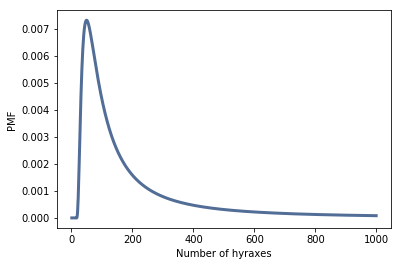

In [4]:
# Solution

thinkplot.Pdf(suite)
thinkplot.Config(xlabel='Number of hyraxes', ylabel='PMF', legend=False)

In [5]:
# Solution

print('Posterior mean', suite.Mean())
print('Maximum a posteriori estimate', suite.MaximumLikelihood())
print('90% credible interval', suite.CredibleInterval(90))

Posterior mean 185.57095794814575
Maximum a posteriori estimate 50
90% credible interval (36, 618)


In [6]:
# Solution

from scipy import stats

class Hyrax2(Suite):
    """Represents hypotheses about how many hyraxes there are."""

    def Likelihood(self, data, hypo):
        """Computes the likelihood of the data under the hypothesis.

        hypo: total population (N)
        data: # tagged (K), # caught (n), # of caught who were tagged (k)
        """
        N = hypo
        K, n, k = data

        if hypo < K + (n - k):
            return 0

        like = stats.hypergeom.pmf(k, N, K, n)
        return like

In [7]:
# Solution

hypos = range(1, 1000)
suite = Hyrax2(hypos)

data = 10, 10, 2
suite.Update(data)

0.04611994519289342

In [8]:
# Solution

print('Posterior mean', suite.Mean())
print('Maximum a posteriori estimate', suite.MaximumLikelihood())
print('90% credible interval', suite.CredibleInterval(90))

Posterior mean 185.57095794814424
Maximum a posteriori estimate 49
90% credible interval (36, 618)
